In [104]:
import math
import random

In [105]:
# Find euclidean distance using Divide and Conquer Approach and brute force approach
# input data

def dataDemo():
    # use this function to test the program with list of pairs that have been initialized before
    data = [[0,0], [1,2], [1,4], [2,2], [2,3], [3,2], [4,1], [5,6]]
    return data

def inputData(data):
    n = int(input("enter number of pairs (must be more than 2): \n"))
    for x in range(n):
        point = []
        xPoint = int(input(f"x{x}:"))
        yPoint = int(input(f"y{x}:"))
        point.append(xPoint)
        point.append(yPoint)
        data.append(point)
    return data

def randomData(data):
    n = int(input("enter number of pairs (must be more than 2): \n"))
    xMax = int(input("enter max value of x: \n"))
    yMax = int(input("enter max value of x: \n"))
    for x in range(n):
        point = []
        xPoint = random.randrange(0,xMax)
        yPoint = random.randrange(0,yMax)
        point.append(xPoint)
        point.append(yPoint)
        for availablePoint in data:
            if availablePoint == point:
                point = []
                xPoint = random.randrange(0,xMax)
                yPoint = random.randrange(0,yMax)
                point.append(xPoint)
                point.append(yPoint)
        data.append(point)
    return data

In [106]:
# function to sort x of each pairs
def sortX(data):
    return sorted(data, key = lambda x:x[0])

In [107]:
data = []
#inputData(data)
#print(data)
#data = dataDemo()

data = randomData(data)
print(data)
data = sortX(data)
print(data)

[[6, 6], [8, 9], [7, 5], [8, 5], [3, 5]]
[[3, 5], [6, 6], [7, 5], [8, 9], [8, 5]]


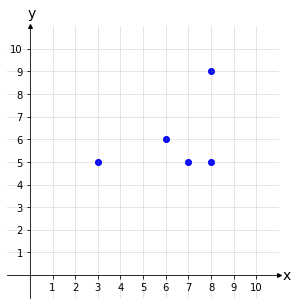

In [108]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = []
ys = []

for points in data:
    xs.append(points[0])
    ys.append(points[1])
colors = ['b']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = 0, 10, 0, 10
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(xs, ys, c=colors)

# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.show()

In [109]:
def euclidianDistanceFormula(x1,y1,x2,y2):
    distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    return distance

In [110]:
def euclidianDistanceBruteForce(data):
    pair, value = [[0,0],[0.0]], 1000000.0
    key = str(pair)
    minDistance = [key,value]
    n = len(data)
    for i in range(n):
        for j in range(i+1,n):
            distance = euclidianDistanceFormula(data[i][0],data[i][1],data[j][0],data[j][1])
            if distance < minDistance[1]:
                pair[0],pair[1] = data[i],data[j]
                value = distance
                key = str(pair)
                minDistanceUpdate = [key,value]
                minDistance = minDistanceUpdate
    return minDistance


In [111]:
jarakTerkecil = euclidianDistanceBruteForce(data)
print(jarakTerkecil)

['[[7, 5], [8, 5]]', 1.0]


In [112]:
def euclideanDistanceDnC(data):
    
    n = len(data)

    #get list of xPoint
    xList = []
    for point in data:
        xPoint = point[0]
        xList.append(xPoint)
    
    #get middle of sumbu x
    def median(xList, n):
        mid = n // 2
        return (xList[mid] + xList[~mid]) / 2

    print(xList)
    middlePoint = median(xList, n)
    print(middlePoint)

    leftPoints, rightPoints = [],[]
    for point in data:
        if point[0] <= middlePoint:
            if len(leftPoints) <= n:
                leftPoints.append(point)
            else:
                rightPoints.append(point)
        else:
            rightPoints.append(point)
    print("Pleft: ",leftPoints)
    print("Pright: ",rightPoints)
    print(euclidianDistanceBruteForce(leftPoints))
    print(euclidianDistanceBruteForce(rightPoints))

euclideanDistanceDnC(data)



[3, 6, 7, 8, 8]
7.0
['[[6, 6], [7, 5]]', 1.4142135623730951]
['[[8, 9], [8, 5]]', 4.0]
